In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('IM_0028.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '133916'
(0008, 0031) Series Time                         TM: '135504.20'
(0008, 0032) Acquisition Time    

In [2]:
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
print('The anatomy imaged is '+str(RefDs.BodyPartExamined))
if RefDs.PatientsSex=='F':
    print('The patient imaged is Female')
else:
    print('The patient imaged is Male')
if RefDs.PatientsName=='':
    print('The patient\'s name is unkown')
else:
    print('The patient\'s name is '+str(RefDs.PatientsName))

The image is 512x512 pixels
The image was encoded with 12 bits 
The manufacturer is Philips Medical Systems and the model is Achieva
The image was made on 2011-01-01
The anatomy imaged is LIVER
The patient imaged is Female
The patient's name is unkown


[0, 511, 0, 511]

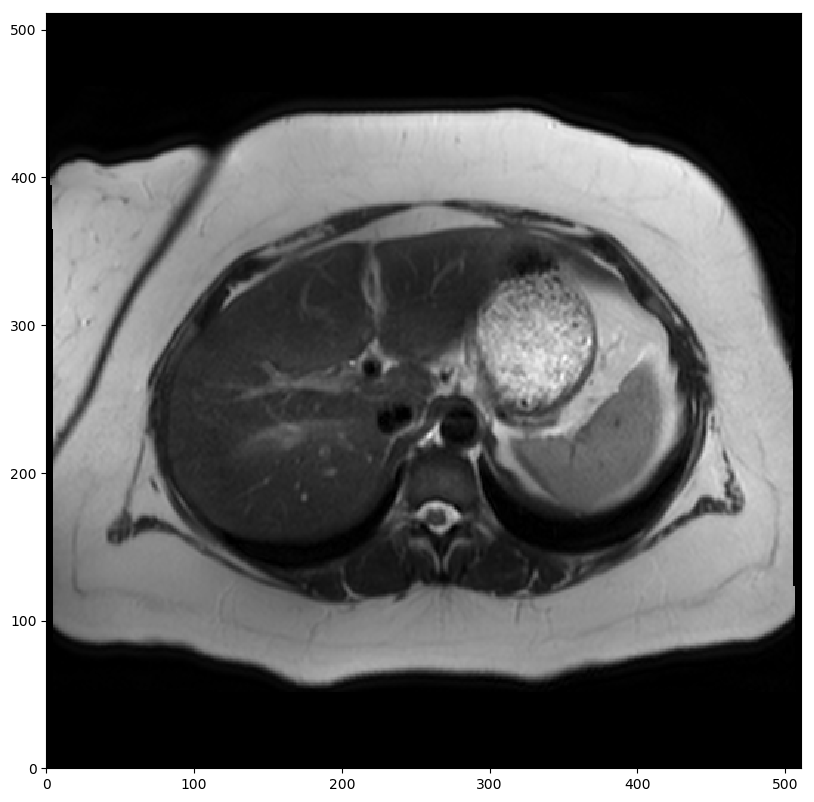

In [7]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0028.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

In [4]:
# Get file
RefDs1 = dicom.read_file('im140.dcm')
# Let's print all the Metadata here
print(RefDs1)

(0008, 0000) Group Length                        UL: 566
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20080603'
(0008, 0013) Instance Creation Time              TM: '073058'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.55.3.1284421438.720.1212483672.467.140
(0008, 0020) Study Date                          DA: '20080603'
(0008, 0021) Series Date                         DA: '20080603'
(0008, 0022) Acquisition Date                    DA: '20080603'
(0008, 0023) Content Date                        DA: '20080603'
(0008, 0030) Study Time                          TM: '072857'
(0008, 0031) Series Time                         TM: '073007'
(0008, 0032) Acquisition Time                    TM: '073017'
(0008, 0033) Content Time                   

In [10]:
# for image im140

from datetime import datetime

print('The image is '+str(RefDs1.Rows)+'x1'+str(RefDs1.Columns)+' pixels')
print('The image was encoded with '+str(RefDs1.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs1.Manufacturer)+' and the model is '+str(RefDs1.ManufacturersModelName))
d1=datetime.strptime(RefDs1.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d1.date()))
print('The anatomy imaged is '+str(RefDs.BodyPartExamined))
if RefDs1.PatientsSex=='F':
    print('The patient imaged is Female')
elif RefDs1.PatientsSex=='M':
    print('The patient imaged is Male')
else:
    print('The patient imaged is Unknown')

if RefDs1.PatientsName=='':
    print('The patient\'s name is unkown')
else:
    print('The patient\'s name is '+str(RefDs1.PatientsName))

The image is 512x1512 pixels
The image was encoded with 16 bits 
The manufacturer is GE MEDICAL SYSTEMS and the model is LightSpeed VCT
The image was made on 2008-06-03
The anatomy imaged is LIVER
The patient imaged is Unknown
The patient's name is unkown


[0, 511, 0, 511]

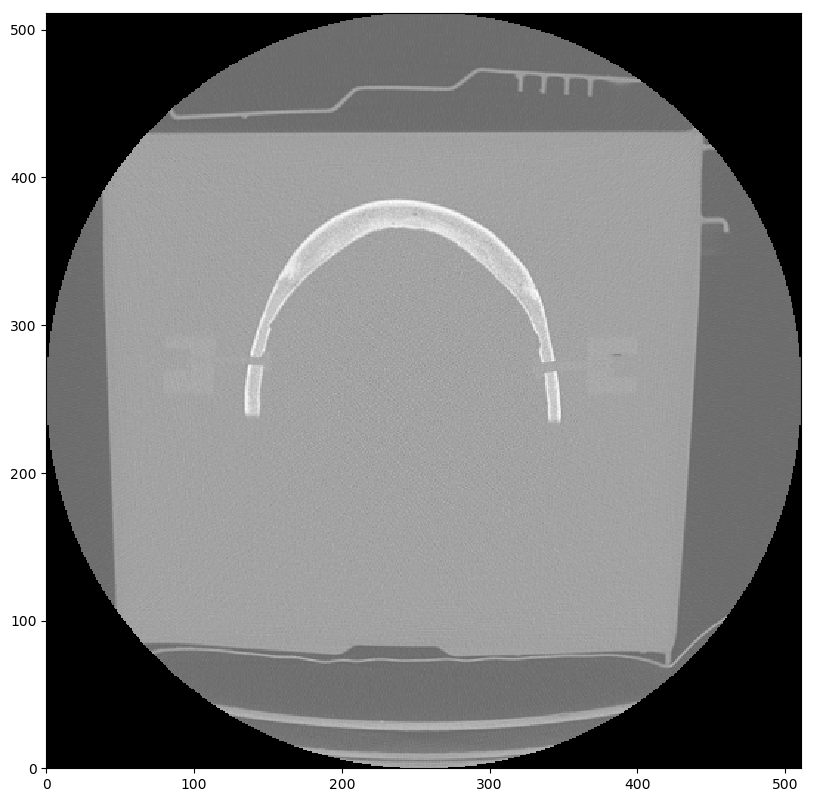

In [9]:
# for image im140

ConstPixelDims = (int(RefDs1.Rows), int(RefDs1.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs1.pixel_array.dtype)
ds1 = dicom.read_file('im140.dcm')
ArrayDicom[:,:]=ds1.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])